Covid 19 CT scan Image classification with VGG19 pretrained model.

Datasets: 2 public datasets stored in the folders CT_DATA (CT_COVID and CT_NonCovid) and SARS-COV-2-DATA.
https://www.kaggle.com/plameneduardo/sarscov2-ctscan-dataset

https://github.com/UCSD-AI4H/COVID-CT

DATA-Split folder : initially used to split data from CT-DATA, but will not be used here in the final.


In [1]:
from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
cov_path = "/content/drive/MyDrive/Colab Notebooks/CTCov/CT_Data/CT_COVID/"
norm_path = "/content/drive/MyDrive/Colab Notebooks/CTCov/CT_Data/CT_NonCOVID/"

In [4]:
IMAGE_SIZE=[224,224]
epochs = 300
batch_size=32
#define paths
covid_path = '/content/drive/MyDrive/Colab Notebooks/CTCov/SARS-COV-2-Data/COVID'
noncovid_path = '/content/drive/MyDrive/Colab Notebooks/CTCov/SARS-COV-2-Data/NON-COVID'

# Use glob to grab images from path .jpg or jpeg
cov_files = glob(cov_path + '/*')
norm_files = glob(norm_path + '/*')

covid_files = glob(covid_path + '/*')
noncovid_files = glob(noncovid_path + '/*')

In [5]:
# Fetch Images and Class Labels from Files
cov_labels = []
norm_labels = []

cov_images=[]
norm_images=[]

for i in range(len(cov_files)):
  image = cv2.imread(cov_files[i]) # read file 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # arrange format as per keras
  image = cv2.resize(image,(224,224)) # resize as per model
  cov_images.append(image) # append image
  cov_labels.append('CT_COVID') #append class label
  
for i in range(len(norm_files)):
  image = cv2.imread(norm_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  norm_images.append(image)
  norm_labels.append('CT_NonCOVID')

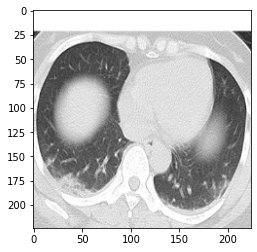

In [6]:
plt.imshow(cov_images[10])

In [9]:
# Fetch Images and Class Labels from Files
covid_labels = []
noncovid_labels = []

covid_images=[]
noncovid_images=[]

for i in range(len(covid_files)):
  image = cv2.imread(covid_files[i]) # read file 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # arrange format as per keras
  image = cv2.resize(image,(224,224)) # resize as per model
  covid_images.append(image) # append image
  covid_labels.append('CT_COVID') #append class label
  
for i in range(len(noncovid_files)):
  image = cv2.imread(noncovid_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  noncovid_images.append(image)
  noncovid_labels.append('CT_NonCOVID')

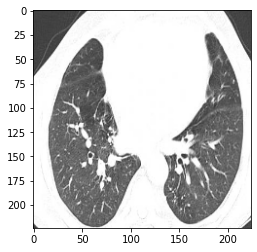

In [10]:
plt.imshow(covid_images[10])

In [11]:
noncovid_labels[10]

'CT_NonCOVID'

In [12]:
cov_img_all = np.concatenate((covid_images, cov_images), axis=0)
norm_img_all = np.concatenate((noncovid_images, norm_images),axis=0)

In [13]:
covid_labels = np.concatenate((covid_labels, cov_labels), axis=0)
noncovid_labels = np.concatenate((noncovid_labels, norm_labels),axis=0)

In [14]:
len(cov_img_all)

1598

# Median Blur

In [39]:
blurred_cov = [cv2.medianBlur(img, 5) for img in cov_img_all]

In [40]:
blurred_norm = [cv2.medianBlur(img, 5) for img in norm_img_all]

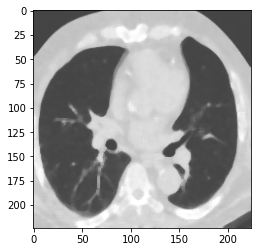

In [41]:
plt.imshow(blurred_cov[100])

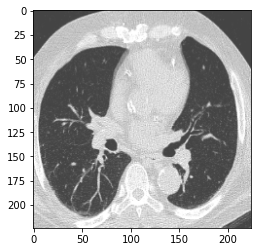

In [42]:
plt.imshow(cov_img_all[100])

In [43]:
len(blurred_cov)

1598

In [44]:
covid_images = np.array(blurred_cov)/255
noncovid_images = np.array(blurred_norm)/255

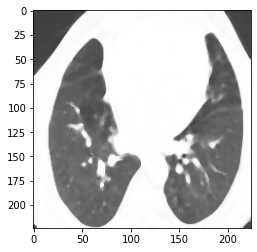

In [45]:
plt.imshow(covid_images[10])

In [46]:
# Split into training and testing sets for both types of images
covid_x_train, covid_x_test, covid_y_train, covid_y_test = train_test_split(
    covid_images, covid_labels, test_size=0.2)
noncovid_x_train, noncovid_x_test, noncovid_y_train, noncovid_y_test = train_test_split(
    noncovid_images, noncovid_labels, test_size=0.2)

# Merge sets for both types of images
X_train = np.concatenate((noncovid_x_train, covid_x_train), axis=0)
X_test = np.concatenate((noncovid_x_test, covid_x_test), axis=0)
y_train = np.concatenate((noncovid_y_train, covid_y_train), axis=0)
y_test = np.concatenate((noncovid_y_test, covid_y_test), axis=0)

# Make labels into categories - either 0 or 1, for our model
y_train = LabelBinarizer().fit_transform(y_train)
y_train = to_categorical(y_train)

y_test = LabelBinarizer().fit_transform(y_test)
y_test = to_categorical(y_test)


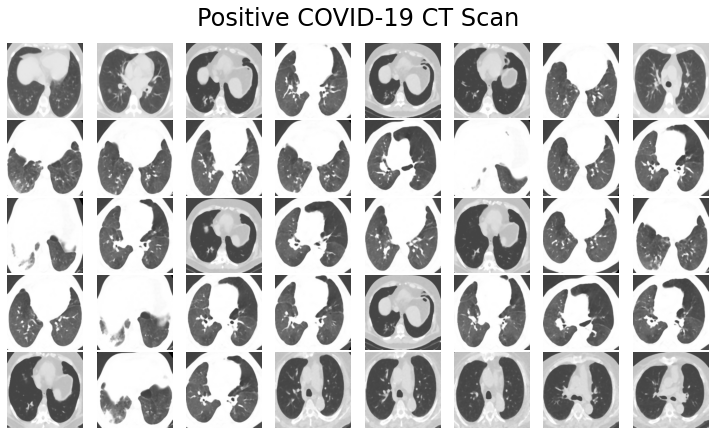

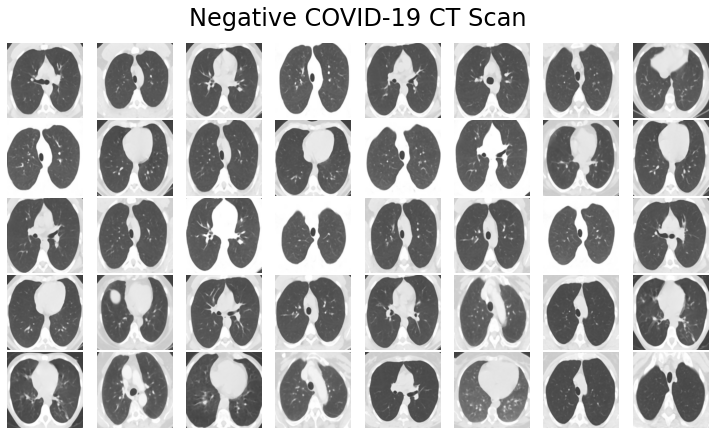

In [47]:
# look at some images
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()
plot_images(covid_images, 'Positive COVID-19 CT Scan')
plot_images(noncovid_images, 'Negative COVID-19 CT Scan')

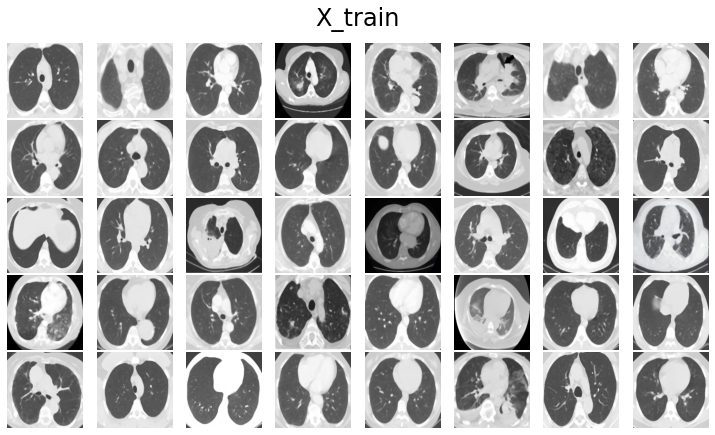

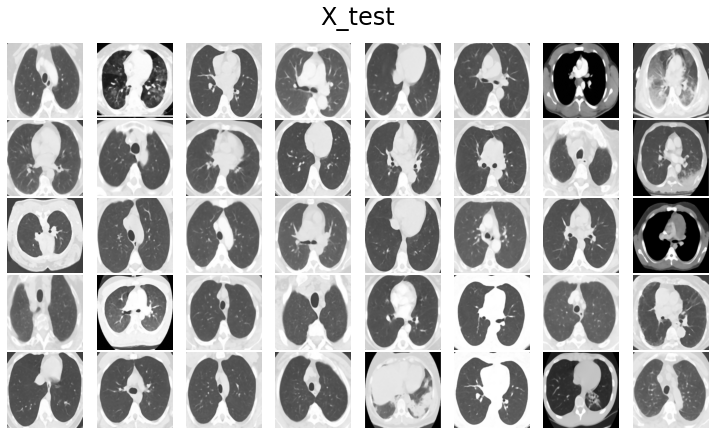

In [48]:
plot_images(X_train, 'X_train')
plot_images(X_test, 'X_test')
# y_train and y_test contain class lables 0 and 1 representing COVID and NonCOVID for X_train and X_test

# VGG model

In [49]:
from tensorflow.keras.applications import VGG19

# Building Model
vggModel = VGG19(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs = vggModel.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

model = Model(inputs=vggModel.input, outputs=outputs)

for layer in vggModel.layers:
    layer.trainable = False

model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)

train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [50]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [51]:
vgg = model.fit(train_aug.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / batch_size,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=epochs)

Epoch 1/300
80/80 [==============================] - 28s 335ms/step - loss: 0.8155 - accuracy: 0.6117 - val_loss: 0.5069 - val_accuracy: 0.7616
Epoch 2/300
80/80 [==============================] - 25s 316ms/step - loss: 0.7388 - accuracy: 0.6540 - val_loss: 1.0003 - val_accuracy: 0.6099
Epoch 3/300
80/80 [==============================] - 25s 314ms/step - loss: 0.6511 - accuracy: 0.6951 - val_loss: 0.4552 - val_accuracy: 0.7895
Epoch 4/300
80/80 [==============================] - 25s 315ms/step - loss: 0.6480 - accuracy: 0.7075 - val_loss: 0.4825 - val_accuracy: 0.7632
Epoch 5/300
80/80 [==============================] - 25s 315ms/step - loss: 0.6374 - accuracy: 0.7203 - val_loss: 0.4621 - val_accuracy: 0.7771
Epoch 6/300
80/80 [==============================] - 25s 315ms/step - loss: 0.7930 - accuracy: 0.6846 - val_loss: 0.4704 - val_accuracy: 0.7895
Epoch 7/300
80/80 [==============================] - 26s 317ms/step - loss: 0.6150 - accuracy: 0.7467 - val_loss: 0.4345 - val_accuracy:

In [57]:
# Save Model and Weights
model.save('/content/drive/MyDrive/Colab Notebooks/CTCov/Median blur/VGG19/vgg_ct.h5')
model.save_weights('/content/drive/MyDrive/Colab Notebooks/CTCov/Median blur/VGG19/vgg_weights_ct.hdf5')

In [52]:
y_pred = model.predict(X_test, batch_size=batch_size)

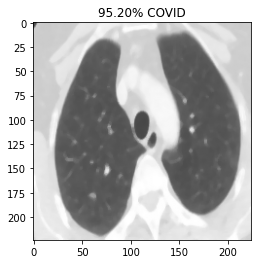

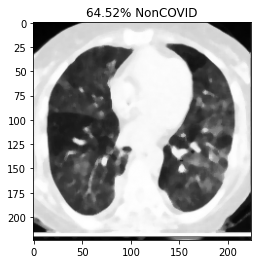

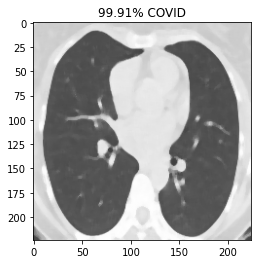

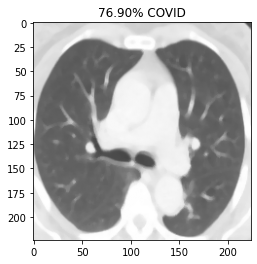

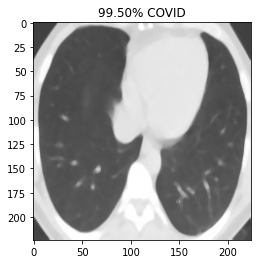

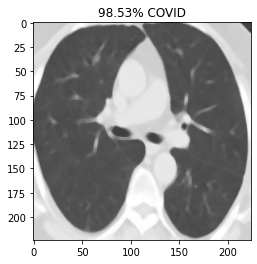

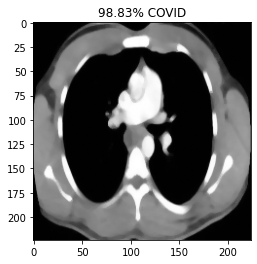

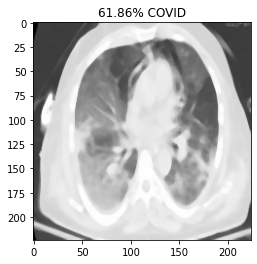

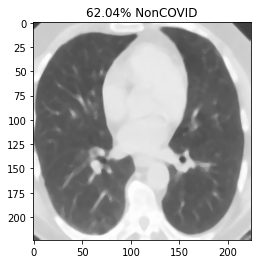

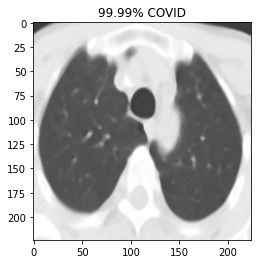

In [53]:
prediction=y_pred[0:10]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% COVID')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% NonCOVID')
  plt.imshow(X_test[index])
  plt.show()

In [54]:
# Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

In [55]:
from sklearn.metrics import classification_report
report = classification_report(y_test_bin, y_pred_bin, output_dict=True)
print(report)

{'0': {'precision': 0.8653846153846154, 'recall': 0.84375, 'f1-score': 0.8544303797468354, 'support': 320}, '1': {'precision': 0.8502994011976048, 'recall': 0.8711656441717791, 'f1-score': 0.8606060606060605, 'support': 326}, 'accuracy': 0.8575851393188855, 'macro avg': {'precision': 0.8578420082911101, 'recall': 0.8574578220858895, 'f1-score': 0.857518220176448, 'support': 646}, 'weighted avg': {'precision': 0.857771953116867, 'recall': 0.8575851393188855, 'f1-score': 0.857546899808921, 'support': 646}}


In [56]:
import pandas as pd
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.865385,0.843750,0.854430,320.000000
1,0.850299,0.871166,0.860606,326.000000
accuracy,0.857585,0.857585,0.857585,0.857585
macro avg,0.857842,0.857458,0.857518,646.000000
weighted avg,0.857772,0.857585,0.857547,646.000000


In [58]:
# or save to csv: 
report_csv_file = '/content/drive/MyDrive/Colab Notebooks/CTCov/Median blur/VGG19/vgg_class_report.csv'
with open(report_csv_file, mode='w') as f:
    report_df.to_csv(f)

In [59]:
test_report = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CTCov/Median blur/VGG19/vgg_class_report.csv')
test_report

,Unnamed: 0,precision,recall,f1-score,support
0,0,0.865385,0.843750,0.854430,320.000000
1,1,0.850299,0.871166,0.860606,326.000000
2,accuracy,0.857585,0.857585,0.857585,0.857585
3,macro avg,0.857842,0.857458,0.857518,646.000000
4,weighted avg,0.857772,0.857585,0.857547,646.000000


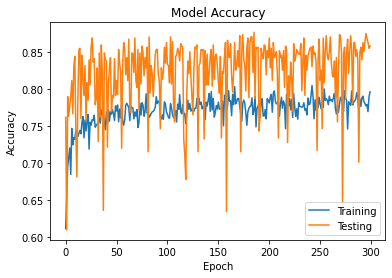

In [60]:
plt.plot(vgg.history['accuracy'])
plt.plot(vgg.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('/content/drive/MyDrive/Colab Notebooks/CTCov/Median blur/VGG19/vgg_ct_accuracy.png')
plt.show()

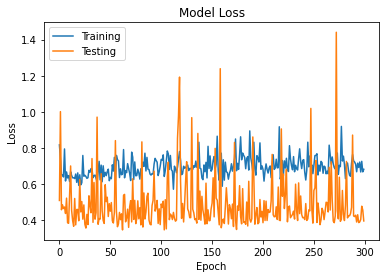

In [61]:
plt.plot(vgg.history['loss'])
plt.plot(vgg.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('/content/drive/MyDrive/Colab Notebooks/CTCov/Median blur/VGG19/vgg_ct_loss.png')
plt.show()

Confusion Matrix without Normalization


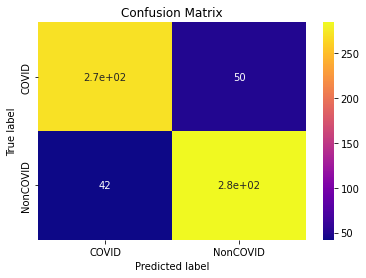

Confusion Matrix with Normalized Values


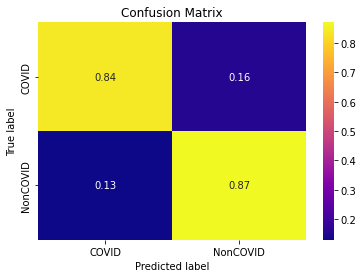

In [63]:
def plot_confusion_matrix(normalize):
  classes = ['COVID','NonCOVID']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  if normalize != 'true':
    plt.savefig("/content/drive/MyDrive/Colab Notebooks/CTCov/Median blur/VGG19/vgg_conf_matrix_not_norm.png")
  else:
    plt.savefig("/content/drive/MyDrive/Colab Notebooks/CTCov/Median blur/VGG19/vgg_conf_matrix_norm.png")
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)
print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [66]:
import pandas as pd

# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(vgg.history) 

In [67]:
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.815509,0.611714,0.506908,0.761610
1,0.738770,0.653995,1.000284,0.609907
2,0.651133,0.695112,0.455216,0.789474
3,0.647952,0.707525,0.482518,0.763158
4,0.637396,0.720326,0.462118,0.777090


In [68]:
# save to json:  
hist_json_file = '/content/drive/MyDrive/Colab Notebooks/CTCov/Median blur/VGG19/vgg_history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv: 
hist_csv_file = '/content/drive/MyDrive/Colab Notebooks/CTCov/Median blur/VGG19/vgg_history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [69]:
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CTCov/Median blur/VGG19/vgg_history.csv")
test_df.head()

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy
0,0,0.815509,0.611714,0.506908,0.761610
1,1,0.738770,0.653995,1.000284,0.609907
2,2,0.651133,0.695112,0.455216,0.789474
3,3,0.647952,0.707525,0.482518,0.763158
4,4,0.637396,0.720326,0.462118,0.777090
